# PROJETO MÓDULO III - Data Science Aplicada

***

## Estatística com python para análise de dados

### Importação das libs

In [124]:
import              pandas                 as pd
import              matplotlib.pyplot      as plt
import              seaborn                as sns
import              numpy                  as np

import warnings
warnings.filterwarnings('ignore')

### Importação dos Datasets

In [8]:
df = pd.read_csv('PENSE_AMOSTRA2_ALUNOESCOLA.CSV', sep=';')
df.head(3)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1,1,1,1,1,1,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1,1,1,1,1,1,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1,1,1,1,1,1,1,3,1,296


In [9]:
# Seleção das colunas
colunas =['VE01P70', 'REGEOGR', 'V0008', 'VB01003', 'VB07004', 'VB07006', 'VB07007', 'VB07008', 'VB07009',
         'VB07010', 'VB12001', 'VB12002', 'VB12003', 'VB11006', 'VB11007', 'VB11001', 'VB11002', 'VB11003',
         'VB11004A', 'VB11005']

In [10]:
# Selecionando somente as colunas que serão utilizadas para análise
df = df[colunas]

In [11]:
colunas = ['politica_contra_bu', 'regiao_geo', 'tipo_escola', 'idade', 'preocupacao_resp', 'amigos_trataram_bem',
          'amigos_trataram_mal', 'motivo_bul', 'praticou_bu', 'ja_sofreu_bul', 'sentido_sozinho',
          'sem_dormir', 'qt_amigos', 'imagem_corporal', 'sentimento_corpo', 'corpo', 'fazendo_corpo', 'remedio_perder_peso',
          'remedio_perder_peso_sem_medico', 'remedio_ganhar_peso']

In [12]:
# Renomeando as colunas
df.columns = colunas

### ENTENDIMENTO DOS DADOS

Nesta seção, será criada uma variável contendo uma tabela com a quantidade de registros em cada uma das colunas.
Esta forma de visualização tem como objetivo entender quais são os dados, analisando o dataset como um todo, poupando tempo e possibilitando um entendimento geral dos dados.

In [22]:
# Contando e agrupando
table = df.apply(pd.Series.value_counts)

# Alterando o tipo de dado para object e os valores nuloes (nan) para a palavra 'None'
table = table.astype(object).replace(np.nan, 'None')

# Substituindo a palavra 'None' para vazio (a fim de facilitar a visualização)
table = table.replace('None', '')

In [23]:
# Visualizando a tabela com a qt. de dados
table

,politica_contra_bu,regiao_geo,tipo_escola,idade,preocupacao_resp,amigos_trataram_bem,amigos_trataram_mal,motivo_bul,praticou_bu,ja_sofreu_bul,sentido_sozinho,sem_dormir,qt_amigos,imagem_corporal,sentimento_corpo,corpo,fazendo_corpo,remedio_perder_peso,remedio_perder_peso_sem_medico,remedio_ganhar_peso
-1,,,,,,,,9250,,,,,,,,,,,,
1,14732,3188,300,,2493,1345,9147,403,2905,7584,5805,5701,642,7102,4608,952,6169,1262,1108,1321
2,1762,3465,9009,,2476,1470,3541,241,13579,8533,3584,4736,988,6604,6920,3261,4688,15107,15243,15007
3,,3276,3072,,3608,3195,2550,705,,387,4580,4149,2056,1969,1807,8822,2674,,,
4,,3207,4175,,2818,4779,670,1110,,,1601,1374,12803,726,2326,2951,2859,,,
5,,3420,,,5070,5677,545,160,,,920,519,,,714,411,,,,
6,,,,,,,,119,,,,,,,,,,,,
7,,,,,,,,4489,,,,,,,,,,,,
9,62,,,,,,,,,,,,,,,,,,,
11,,,,2072,,,,,,,,,,,,,,,,


## POLÍTICA CONTRA BULLYING

***

Em 2016 entrou em vigor a Lei nº 13.185 que classifica o bullying como intimidação sistemática, quando há violência física ou psicológica em atos de humilhação ou discriminação. A classificação também inclui ataques físicos, insultos, ameaças, comentários e apelidos pejorativos, entre outros. 

Fonte: <a href="http://portal.mec.gov.br/component/tags/tag/34487#:~:text=A%20Lei%20n%C2%BA%2013.185%2C%20em,e%20apelidos%20pejorativos%2C%20entre%20outros.">Ministério da Educação</a>


<img src="https://i.ibb.co/TcQGPp3/Captura-de-Tela-2021-01-07-a-s-22-13-32.png" alt="Captura-de-Tela-2021-01-07-a-s-22-13-32" width="540" height="281">


Como analisado abaixo, a maior parte dos alunos responderam afirmativamente a pergunta:

**A escola tem alguma política, norma ou regra escrita que proíba bullying nas suas dependências?**

In [74]:
# Criando e agrupando
q = df['politica_contra_bu'].value_counts()
p = df['politica_contra_bu'].value_counts(normalize = True) * 100

# Criando um DataFrame
t = pd.DataFrame({'Qt' : q, 'Perc' : p})
t 

,Qt,Perc
1,14732,88.982846
2,1762,10.642667
9,62,0.374487


In [75]:
# Selecionando os alunos que responderam 'nao' para política contra bullying e
# calculando a qt. e o percentual por idade

q = df[df['politica_contra_bu'] == 2]['idade'].value_counts()
p = df[df['politica_contra_bu'] == 2]['idade'].value_counts(normalize = True) * 100

#Criando dataframe
t = pd.DataFrame({'Qt' : q, 'Perc' : p}).sort_values(by='Perc', ascending=False)
t 

,Qt,Perc
12,262,14.869467
15,252,14.301930
14,250,14.188422
13,237,13.450624
11,216,12.258797
16,211,11.975028
17,178,10.102157
18,92,5.221339
19,64,3.632236


In [77]:
# Selecionando os alunos que responderam 'sim' para política contra bullying e
# calculando a qt. e o percentual por idade

q = df[df['politica_contra_bu'] == 1]['idade'].value_counts()
p = df[df['politica_contra_bu'] == 1]['idade'].value_counts(normalize = True) * 100

# Criando dataframe
t = pd.DataFrame({'Qt' : q, 'Perc' : p}).sort_values(by='Perc', ascending=False)
t 

,Qt,Perc
12,2372,16.101005
13,2324,15.775183
15,2171,14.736628
16,2041,13.854195
14,1883,12.781700
11,1856,12.598425
17,1322,8.973663
18,466,3.163182
19,297,2.016020


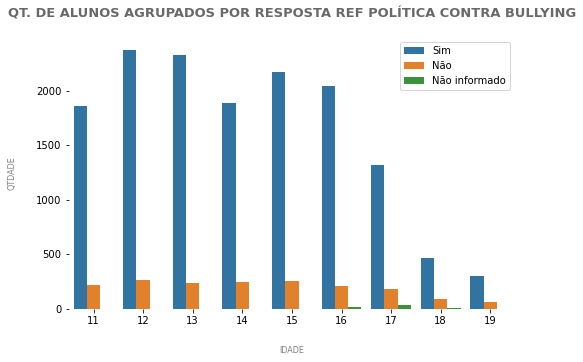

In [121]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(data=df, x='idade' ,hue='politica_contra_bu')

plt.title('QT. DE ALUNOS AGRUPADOS POR RESPOSTA REF POLÍTICA CONTRA BULLYING',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax = sns.despine(bottom = True, left=True)
ax = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
ax = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
ax = plt.legend(labels=['Sim', 'Não', 'Não informado'])

Quase 90% dos alunos responderam que existem políticas, regras ou normas que proíbem bullying nas dependências da escola.

A maior quantidade de alunos que não responderam a pergunta se concentra nas idades maiores

Alunos que reponderam "sim" se concentram nos 12, 13, 15 anos, seguido por 16 e 11 anos.

Vale lembrar que se trata de **quantidades**, ou seja, na amostra, pode haver maior quantidade de alunos em determinadas idades, o que, logicamente, altera a visualização do gráfico.

***

Pela análise dos dados, nota-se que a idade está bastante distribuída, logo, esta variável não será considerada nas análises seguintes. O mesmo será aplicado nos casos de regiões e tipo de escola.

***